In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
from datetime import datetime
import re
import sys
sys.path.append('../src/')

import fasttext
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
import seaborn as sns
sns.set_theme()

from data_processing.dataset_processor import DataProcessor

In [7]:
BASE_DATA_PATH = "/data/ddmg/personalizedmentalhealth/reddit_project/data"

## Load Data

In [10]:
subreddits = os.listdir(BASE_DATA_PATH)
subreddits = [x for x in subreddits if not x.endswith('.csv')]
subreddits = sorted(subreddits)
subreddits

['AskDocs',
 'Family',
 'bitcoin',
 'investing',
 'medical',
 'mentalhealth',
 'personalfinance',
 'processed',
 'relationship_advice',
 'relationships']

In [11]:
data_dirs = [os.path.join(BASE_DATA_PATH, sr, "posts") for sr in subreddits]

In [10]:
df_list = []
text_df_list = []
for data_dir in data_dirs:
    data_df = pd.read_csv(os.path.join(data_dir, "all.csv"), low_memory=False)
    data_df.drop(columns="Unnamed: 0", inplace=True)
    df_list.append(data_df)
    text_df = pd.read_csv(os.path.join(data_dir, "2_processed_text.csv"))
    text_df.drop(columns="Unnamed: 0", inplace=True)
    text_df_list.append(text_df)
data_df = pd.concat(df_list)
text_df = pd.concat(text_df_list)

In [11]:
data_df

,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,post_hint,preview,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,link_flair_template_id,is_gallery,gallery_data,poll_data
0,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,"Mother is visiting for 2-weeks, can't read her...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,My sister is slowly killing my father. How can...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,Easily find fun local events to do with your k...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,This is weird but I wondered if I could have s...,[],False,NaN,0,False,My Mum is acting really weird.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,[deleted],[],False,NaN,0,False,My boyfriend's family is crazy and I'm pregnant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94685,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[deleted],[],False,NaN,0,False,Can someone explain what these partial mortage...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94686,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[removed],[],False,NaN,0,False,What to do with 150k inheritance want to gener...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94687,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Every year around this time I get mail stating...,[],False,NaN,0,False,Am I (son) responsible for my deceased father'...,...,NaN,NaN,NaN,NaN,NaN,NaN,3a006744-c078-11e4-87bd-22000b3e820a,NaN,NaN,NaN
94688,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[deleted],[],False,NaN,1,False,Is there a way to be disabled and still make a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
text_df

,id,text
0,2rrm7n,My Mum is acting really weird. This is weird b...
1,2rgc78,Awkward Situations w/ My Dad? Hi Everyone! I'm...
2,2rdr14,Just found out my father isn't my father (afte...
3,2rbrfq,Our mother left her family A public letter to ...
4,2r6afm,"Sister's shit of a ""man"" So my sister has 2 ki..."
...,...,...
51259,knek0k,"HELP! ""Large"" savings account, pay down debt o..."
51260,kneht6,Help me understand my statement balance? [http...
51261,kneh32,HSA Account Fees I have an old HSA from old em...
51262,knedb8,Am I (son) responsible for my deceased father'...


In [13]:
text_df["id"].value_counts()

ajrveg    1
4r57po    1
j0ts64    1
9nczgh    1
f8poqs    1
         ..
4k7o2g    1
6wsco9    1
g8z1u8    1
cja4mn    1
if7lv0    1
Name: id, Length: 1379459, dtype: int64

In [14]:
data_df["id"].value_counts()

84xmb9    1
fcxqll    1
91226f    1
hck4tz    1
7ia85z    1
         ..
ktpv8i    1
cmtemy    1
7mj9lp    1
cbrq13    1
dfffkh    1
Name: id, Length: 4612147, dtype: int64

In [15]:
data_df = data_df.merge(text_df, how="inner", on="id")

In [16]:
data_df

,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,preview,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,link_flair_template_id,is_gallery,gallery_data,poll_data,text
0,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,This is weird but I wondered if I could have s...,[],False,NaN,0,False,My Mum is acting really weird.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My Mum is acting really weird. This is weird b...
1,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"Hi Everyone! I'm Jay 13 years old, I have a pr...",[],False,NaN,0,False,Awkward Situations w/ My Dad?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Awkward Situations w/ My Dad? Hi Everyone! I'm...
2,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"So, yesterday I was helping my mother with her...",[],False,NaN,0,False,Just found out my father isn't my father (afte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Just found out my father isn't my father (afte...
3,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"A public letter to my mother, Bonnie (aka Ambe...",[],False,NaN,0,False,Our mother left her family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Our mother left her family A public letter to ...
4,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,So my sister has 2 kids and is pregnant with a...,[],False,NaN,0,False,"Sister's shit of a ""man""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sister's shit of a ""man"" So my sister has 2 ki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379454,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Im hoping for some thoughts about my financial...,[],False,NaN,0,False,"HELP! ""Large"" savings account, pay down debt o...",...,NaN,NaN,NaN,NaN,NaN,1c57f8a6-c078-11e4-9e41-22000b39cb96,NaN,NaN,NaN,"HELP! ""Large"" savings account, pay down debt o..."
1379455,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[https://imgur.com/zzbihK9](https://imgur.com/...,[],False,NaN,0,False,Help me understand my statement balance?,...,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Help me understand my statement balance? [http...
1379456,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,I have an old HSA from old employer and it's c...,[],False,NaN,0,False,HSA Account Fees,...,NaN,NaN,NaN,NaN,NaN,2361ec24-c078-11e4-acc1-22000b290247,NaN,NaN,NaN,HSA Account Fees I have an old HSA from old em...
1379457,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Every year around this time I get mail stating...,[],False,NaN,0,False,Am I (son) responsible for my deceased father'...,...,NaN,NaN,NaN,NaN,NaN,3a006744-c078-11e4-87bd-22000b3e820a,NaN,NaN,NaN,Am I (son) responsible for my deceased father'...


In [17]:
user_counts = data_df[["id", "author"]].groupby(by="author").count()

In [18]:
user_counts

,id
author,
*polhold00274,3
*tmhold00196,1
----------1,1
-------dingo,1
------___--___------,1
...,...
zzzzzzzzzz7,1
zzzzzzzzzzzzccccccgg,4
zzzzzzzzzzzzzxzzzzzz,1


In [22]:
test_users = user_counts[user_counts["id"] >= 30]
test_users.index.to_numpy()

array(['101111', '123wanderlust', '19931', '1blockologist', '1gudboi',
       '45sbvad', '5tu', '7bitcoin', '86753q9', 'AManInBlack2017',
       'AbsyntheMinded_', 'Adiozatwozerofive', 'AmericanMare',
       'Amichateur', 'AnalyzerX7', 'Andr3867', 'AnimatedPie',
       'AnnaOrnala', 'Annapurna__', 'Anynon1', 'AnythingForSuccess',
       'ApwoperMuser', 'ArthurJMunoz', 'Austins-Reddit', 'AutoModerator',
       'Awkward_Ant', 'Azerty800', 'BCJoey', 'BRoccoli20', 'Bad_Wulph',
       'Banana_mufn', 'Barfings', 'BashCoBot', 'BeastMiners',
       'Beast_and_the_harlot', 'BillNye69', 'BillyHodson',
       'BitcoinAlways', 'BitcoinCanSaveUsAll', 'BitcoinCollege',
       'BitcoinDreamland', 'BitcoinIsSimple', 'BitcoinReminder_com',
       'Bitcoin_Acolyte', 'Bitcoiniswin', 'BlackMathNerd',
       'BodyweightD00D', 'Bograshov', 'Bradybunch24', 'BrainDamageLDN',
       'BrokelynNYC', 'Btcyoda', 'COMPUTER1313', 'COYS2015',
       'Calm_down_stupid', 'Ce_ne', 'Chad_arbc', 'ChocolateTsar',
       'C

In [35]:
test_users = test_users.index.to_numpy()
len(test_users)

596

In [24]:
train_frac = .6
val_frac = .2
test_frac = .2

In [29]:
data_df["data_split"] = "train"

In [36]:
user = test_users[0]
user_ids = data_df[data_df["author"] == user].index.values
user_ids

array([477834, 478209, 479262, 479311, 479721, 484729, 485275, 486383,
       486510, 486691, 487098, 488721, 488829, 489873, 490249, 491247,
       491590, 492001, 492082, 492207, 493478, 493610, 494301, 494436,
       494925, 495274, 495298, 496018, 496803, 496963, 498987, 500185,
       503764, 504367, 506346, 506566, 512150, 513481, 517895, 518382,
       521259, 521703, 528734])

In [37]:
for user in test_users:
    user_ids = data_df[data_df["author"] == user].index.values
    # split randomly
    data_len = len(user_ids)
    train_count = int(data_len * train_frac)
    val_count = int(data_len * val_frac)
    test_count = data_len - train_count - val_count
    assignments = ["train"] * train_count + ["val"] * val_count + ["test"] * test_count
    np.random.shuffle(assignments)
    data_df.loc[user_ids, ["data_split"]] = assignments

In [38]:
data_df

,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,link_flair_template_id,is_gallery,gallery_data,poll_data,text,data_split
0,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,This is weird but I wondered if I could have s...,[],False,NaN,0,False,My Mum is acting really weird.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My Mum is acting really weird. This is weird b...,train
1,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"Hi Everyone! I'm Jay 13 years old, I have a pr...",[],False,NaN,0,False,Awkward Situations w/ My Dad?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Awkward Situations w/ My Dad? Hi Everyone! I'm...,train
2,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"So, yesterday I was helping my mother with her...",[],False,NaN,0,False,Just found out my father isn't my father (afte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Just found out my father isn't my father (afte...,train
3,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"A public letter to my mother, Bonnie (aka Ambe...",[],False,NaN,0,False,Our mother left her family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Our mother left her family A public letter to ...,train
4,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,So my sister has 2 kids and is pregnant with a...,[],False,NaN,0,False,"Sister's shit of a ""man""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sister's shit of a ""man"" So my sister has 2 ki...",train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379454,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Im hoping for some thoughts about my financial...,[],False,NaN,0,False,"HELP! ""Large"" savings account, pay down debt o...",...,NaN,NaN,NaN,NaN,1c57f8a6-c078-11e4-9e41-22000b39cb96,NaN,NaN,NaN,"HELP! ""Large"" savings account, pay down debt o...",train
1379455,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[https://imgur.com/zzbihK9](https://imgur.com/...,[],False,NaN,0,False,Help me understand my statement balance?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Help me understand my statement balance? [http...,train
1379456,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,I have an old HSA from old employer and it's c...,[],False,NaN,0,False,HSA Account Fees,...,NaN,NaN,NaN,NaN,2361ec24-c078-11e4-acc1-22000b290247,NaN,NaN,NaN,HSA Account Fees I have an old HSA from old em...,train
1379457,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Every year around this time I get mail stating...,[],False,NaN,0,False,Am I (son) responsible for my deceased father'...,...,NaN,NaN,NaN,NaN,3a006744-c078-11e4-87bd-22000b3e820a,NaN,NaN,NaN,Am I (son) responsible for my deceased father'...,train


In [39]:
data_df["data_split"].value_counts()

train    1364349
test        7884
val         7226
Name: data_split, dtype: int64

In [40]:
data_df["author"].unique()

array(['Fearlessfight', 'AstroKate', 'bigguytx', ..., 'SocoCocoPuffs',
       'natevani', 'callmeqws'], dtype=object)

In [43]:
dp = DataProcessor(data_dirs)

In [44]:
dp.data_df

,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,preview,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,link_flair_template_id,is_gallery,gallery_data,poll_data,text
0,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,This is weird but I wondered if I could have s...,[],False,NaN,0,False,My Mum is acting really weird.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My Mum is acting really weird. This is weird b...
1,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"Hi Everyone! I'm Jay 13 years old, I have a pr...",[],False,NaN,0,False,Awkward Situations w/ My Dad?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Awkward Situations w/ My Dad? Hi Everyone! I'm...
2,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"So, yesterday I was helping my mother with her...",[],False,NaN,0,False,Just found out my father isn't my father (afte...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Just found out my father isn't my father (afte...
3,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,"A public letter to my mother, Bonnie (aka Ambe...",[],False,NaN,0,False,Our mother left her family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Our mother left her family A public letter to ...
4,<praw.reddit.Reddit object at 0x7f7e0d9601f0>,NaN,family,So my sister has 2 kids and is pregnant with a...,[],False,NaN,0,False,"Sister's shit of a ""man""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sister's shit of a ""man"" So my sister has 2 ki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379454,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Im hoping for some thoughts about my financial...,[],False,NaN,0,False,"HELP! ""Large"" savings account, pay down debt o...",...,NaN,NaN,NaN,NaN,NaN,1c57f8a6-c078-11e4-9e41-22000b39cb96,NaN,NaN,NaN,"HELP! ""Large"" savings account, pay down debt o..."
1379455,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,[https://imgur.com/zzbihK9](https://imgur.com/...,[],False,NaN,0,False,Help me understand my statement balance?,...,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Help me understand my statement balance? [http...
1379456,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,I have an old HSA from old employer and it's c...,[],False,NaN,0,False,HSA Account Fees,...,NaN,NaN,NaN,NaN,NaN,2361ec24-c078-11e4-acc1-22000b290247,NaN,NaN,NaN,HSA Account Fees I have an old HSA from old em...
1379457,<praw.reddit.Reddit object at 0x7ff3d967c040>,NaN,personalfinance,Every year around this time I get mail stating...,[],False,NaN,0,False,Am I (son) responsible for my deceased father'...,...,NaN,NaN,NaN,NaN,NaN,3a006744-c078-11e4-87bd-22000b3e820a,NaN,NaN,NaN,Am I (son) responsible for my deceased father'...


In [45]:
dp.assign_datasplit()

596/969430 users have at least 30 posts = 0.06147942605448563%. Including them as test users.
final dataset has 1364349 train examples from 969430 users, and 7226 val examples and 7884 test examples from 596 users


In [46]:
dp.save(BASE_DATA_PATH)

In [52]:
list(dp.data_df.columns)

['_reddit',
 'approved_at_utc',
 'subreddit',
 'selftext',
 'user_reports',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_category',
 'banned_by',
 'domain',
 'allow_live_comments',
 'selftext_html',
 'likes',
 'suggested_sort',
 'banned_at_utc',
 'view_

In [54]:
dp.save_all(BASE_DATA_PATH, columns=["id", "author", "data_split", "subreddit", "text", "created_utc"])

In [47]:
train_df = dp.data_df[dp.data_df["data_split"] == "train"]
val_df = dp.data_df[dp.data_df["data_split"] == "val"]
test_df = dp.data_df[dp.data_df["data_split"] == "test"]

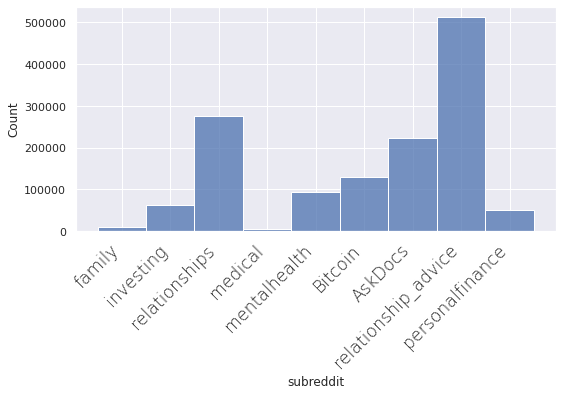

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(data=train_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

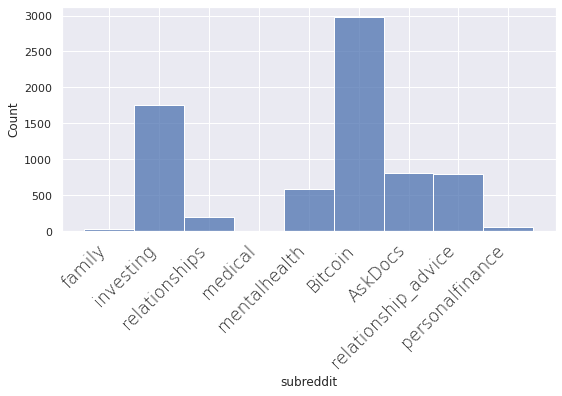

In [49]:
plt.figure(figsize=(8,4))
sns.histplot(data=val_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

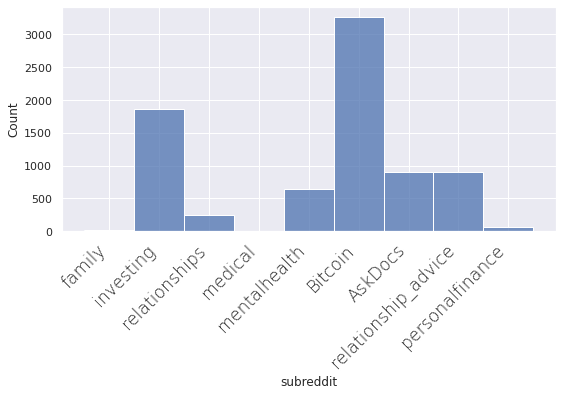

In [50]:
plt.figure(figsize=(8,4))
sns.histplot(data=test_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()